# Analysis of Zeek logs

In [2]:
import pandas as pd
import json
import gzip
import glob
import os
import seaborn as sb

%matplotlib inline
import matplotlib.pyplot as plt


### Extract gz files

In [2]:
path = './data/2020-06-03/' 
all_files = glob.glob(os.path.join(path,"ssh.*.log.gz"))

In [6]:
df_list = []

for jsonfilename in all_files:
    with gzip.GzipFile(jsonfilename, 'r') as json_file:
        for line in json_file:
            json_data = json.loads(line)
           
            timestamp = json_data['ts']
            source_ip = json_data['id.orig_h']
            source_port = json_data['id.orig_p']
            destination_ip = json_data['id.resp_h']
            destination_port = json_data['id.resp_p']
            
            if 'auth_success' in json_data:
                authentication_success = json_data['auth_success']
            else:
                authentication_success = 'NaN'
            authentication_attempts = json_data['auth_attempts']
            
            if 'client' in json_data:
                client = json_data['client']
            else:
                client = 'NaN'
            
            server = json_data['server']
            

            df_list.append({'timestamp':pd.to_datetime(timestamp),
                           'source_ip': str(source_ip),
                           'source_port': int(source_port),
                           'destination_ip':str(destination_ip),
                           'destination_port':int(destination_port),
                           'authentication_success': bool(authentication_success),
                           'authentication_attempts':int(authentication_attempts),
                           'client':str(client),
                           'server':str(server)})


Create data frame from dictionary

In [8]:
ssh_df = pd.DataFrame(df_list, columns =['timestamp', 'source_ip', 'source_port', 'destination_ip', 
                                          'destination_port', 'authentication_success', 'authentication_attempts',
                                         'client', 'server'])
ssh_df.head()

,timestamp,source_ip,source_port,destination_ip,destination_port,authentication_success,authentication_attempts,client,server
0,1970-01-01 00:00:01.591124392,177.220.133.158,49491,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
1,1970-01-01 00:00:01.591124396,78.42.135.89,38256,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
2,1970-01-01 00:00:01.591124398,158.69.223.91,34242,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
3,1970-01-01 00:00:01.591124402,218.92.0.192,28864,115.186.176.141,22,False,3,SSH-2.0-PUTTY,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
4,1970-01-01 00:00:01.591124405,138.197.5.123,49904,115.186.176.141,22,True,0,SSH-2.0-libssh2_1.8.0,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3


In [9]:
ssh_df.shape

(9404, 9)

*Store dataframe to csv*

In [10]:
ssh_df.to_csv('./data/2020-06-03/ssh_logs.csv', index = False)

In [11]:
ssh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9404 entries, 0 to 9403
Data columns (total 9 columns):
timestamp                  9404 non-null datetime64[ns]
source_ip                  9404 non-null object
source_port                9404 non-null int64
destination_ip             9404 non-null object
destination_port           9404 non-null int64
authentication_success     9404 non-null bool
authentication_attempts    9404 non-null int64
client                     9404 non-null object
server                     9404 non-null object
dtypes: bool(1), datetime64[ns](1), int64(3), object(4)
memory usage: 597.0+ KB


### Attackers Connections

In [3]:
df_merged = pd.read_csv('./data/2020-06-03/ssh_logs.csv')

In [13]:
df_merged.head()

,timestamp,source_ip,source_port,destination_ip,destination_port,authentication_success,authentication_attempts,client,server
0,1970-01-01 00:00:01.591124392,177.220.133.158,49491,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
1,1970-01-01 00:00:01.591124396,78.42.135.89,38256,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
2,1970-01-01 00:00:01.591124398,158.69.223.91,34242,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
3,1970-01-01 00:00:01.591124402,218.92.0.192,28864,115.186.176.141,22,False,3,SSH-2.0-PUTTY,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
4,1970-01-01 00:00:01.591124405,138.197.5.123,49904,115.186.176.141,22,True,0,SSH-2.0-libssh2_1.8.0,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3


###  What are Attackers Source Ip's

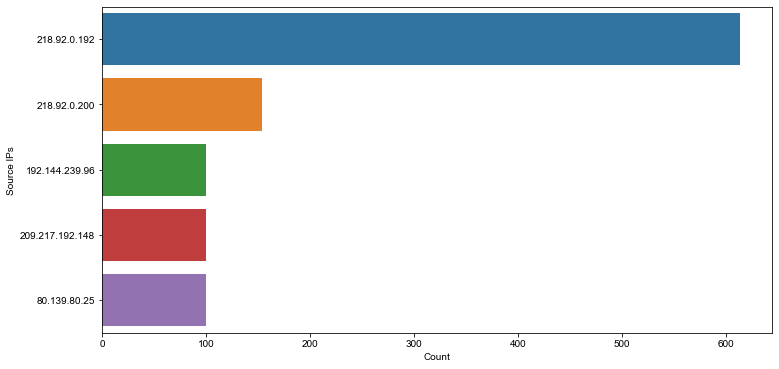

In [14]:
plt.figure(figsize=(12,6))
sb.countplot(data=df_merged, y='source_ip', order=df_merged.source_ip.value_counts().iloc[:5].index,
            orient = 'h');
sb.set_style("dark")
plt.ylabel('Source IPs')
plt.xlabel('Count');

### Attackers Source Port

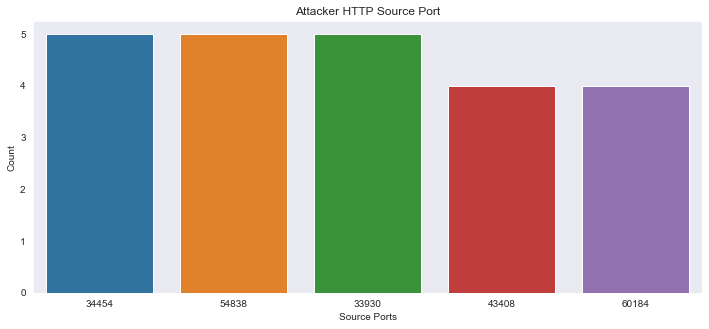

In [15]:

plt.figure(figsize=(12,5))
sb.countplot(data=df_merged, x='source_port', order=df_merged.source_port.value_counts().iloc[:5].index,
            orient = 'h');
sb.set_style("dark")
plt.title('Attacker HTTP Source Port')
plt.ylabel('Count')
plt.xlabel('Source Ports');

### Attackers Destination IP

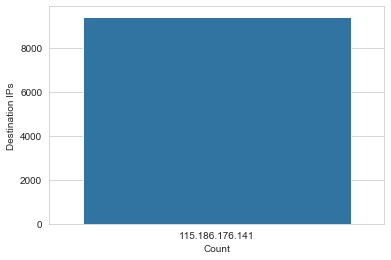

In [20]:
#plt.figure(figsize=(6,6))
sb.countplot(data=df_merged, x='destination_ip', order=df_merged.destination_ip.value_counts().iloc[:5].index,
            orient = 'h');
sb.set_style("whitegrid")
plt.ylabel('Destination IPs')
plt.xlabel('Count');

### Attackers Destination PORTs

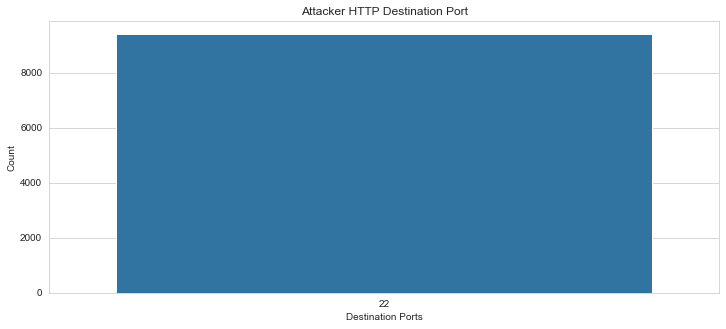

In [21]:
plt.figure(figsize=(12,5))
sb.countplot(data=df_merged, x='destination_port', order=df_merged.destination_port.value_counts().iloc[:5].index,
            orient = 'h');
sb.set_style("dark")
plt.title('Attacker HTTP Destination Port')
plt.ylabel('Count')
plt.xlabel('Destination Ports');

### What are the attacker SSH authentication successful rate?

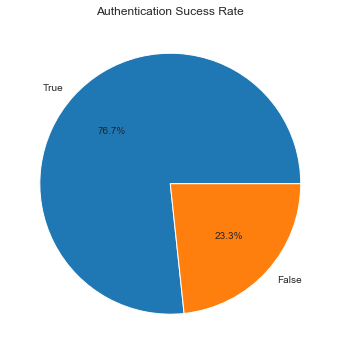

In [24]:
plt.figure(figsize=(6,6))
plt.pie(sum_auth, labels= sum_auth.index, autopct='%1.1f%%')
plt.title('Authentication Sucess Rate')
plt.show();

### What are the number of authentication attempts?

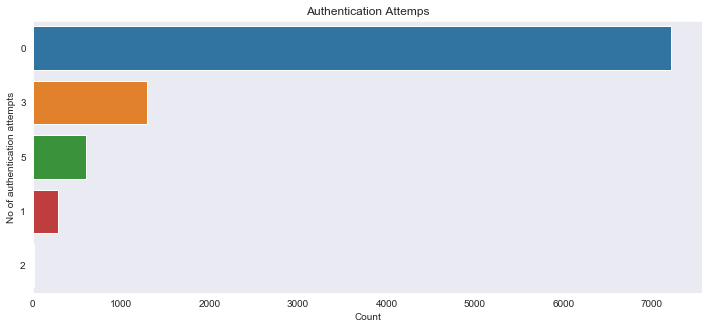

In [27]:
plt.figure(figsize=(12,5))
sb.countplot(data=df_merged, y='authentication_attempts', order=df_merged.authentication_attempts.value_counts().iloc[:5].index,
            orient = 'h');
sb.set_style("dark")
plt.title('Authentication Attemps')
plt.ylabel('No of authentication attempts')
plt.xlabel('Count');

#### Investigate further authentication attempts 0

In [13]:
df_merged.query('authentication_attempts == 0' )

,timestamp,source_ip,source_port,destination_ip,destination_port,authentication_success,authentication_attempts,client,server
0,1970-01-01 00:00:01.591124392,177.220.133.158,49491,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
1,1970-01-01 00:00:01.591124396,78.42.135.89,38256,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
2,1970-01-01 00:00:01.591124398,158.69.223.91,34242,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
4,1970-01-01 00:00:01.591124405,138.197.5.123,49904,115.186.176.141,22,True,0,SSH-2.0-libssh2_1.8.0,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
5,1970-01-01 00:00:01.591124408,175.6.35.46,43738,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
6,1970-01-01 00:00:01.591124415,59.80.34.110,55668,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
7,1970-01-01 00:00:01.591124424,119.92.118.59,44646,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
8,1970-01-01 00:00:01.591124428,163.44.150.59,51221,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
9,1970-01-01 00:00:01.591124431,192.144.191.17,39917,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
10,1970-01-01 00:00:01.591124433,167.71.155.236,50408,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3


In [17]:
df_merged.query('authentication_attempts == 0 and authentication_success == True' )

,timestamp,source_ip,source_port,destination_ip,destination_port,authentication_success,authentication_attempts,client,server
0,1970-01-01 00:00:01.591124392,177.220.133.158,49491,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
1,1970-01-01 00:00:01.591124396,78.42.135.89,38256,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
2,1970-01-01 00:00:01.591124398,158.69.223.91,34242,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
4,1970-01-01 00:00:01.591124405,138.197.5.123,49904,115.186.176.141,22,True,0,SSH-2.0-libssh2_1.8.0,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
5,1970-01-01 00:00:01.591124408,175.6.35.46,43738,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
6,1970-01-01 00:00:01.591124415,59.80.34.110,55668,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
7,1970-01-01 00:00:01.591124424,119.92.118.59,44646,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
8,1970-01-01 00:00:01.591124428,163.44.150.59,51221,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
9,1970-01-01 00:00:01.591124431,192.144.191.17,39917,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3
10,1970-01-01 00:00:01.591124433,167.71.155.236,50408,115.186.176.141,22,True,0,SSH-2.0-libssh-0.6.3,SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3


### What are the client SSH version?

In [35]:
df_merged.replace(to_replace="SSH-2.0-PuTTY", value ="SSH-2.0-PUTTY", inplace = True)

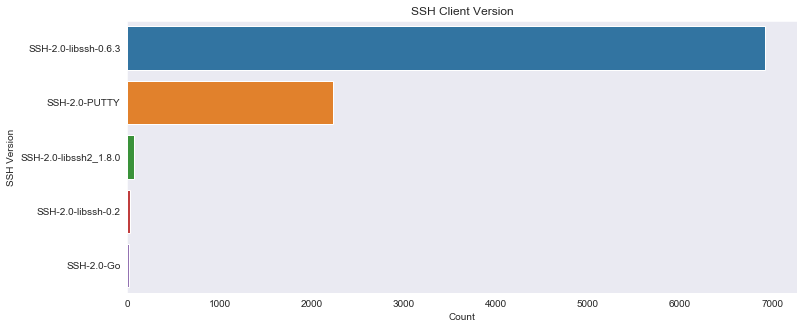

In [37]:
plt.figure(figsize=(12,5))
sb.countplot(data=df_merged, y='client', order=df_merged.client.value_counts().iloc[:5].index,
            orient = 'h');
sb.set_style("dark")
plt.title('SSH Client Version')
plt.ylabel('SSH Version')
plt.xlabel('Count');

### What are the SSH Server Versions

In [38]:
df_merged['server'].value_counts()

SSH-2.0-OpenSSH_7.6p1 Ubuntu-4ubuntu0.3    9404
Name: server, dtype: int64